In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.dates as mdates
import seaborn as sns

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 12, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:
# clean Button dataset (identify the participant)
Button = './dataset/Button.csv' 
df_Button = pd.read_csv(Button, encoding= 'unicode_escape')
df_Button = df_Button.drop(df_Button.columns[[0,1,3,4,5,6,8,9]], axis=1)
df_Button['ts'] = pd.to_datetime(df_Button['ts'])
df_Button.drop( df_Button[ df_Button['ts'] < pd.Timestamp(2021,11,13) ].index, inplace=True)
# 0 means no one, the other value means someone
df_Button.loc[df_Button['button_status'] == 1, 'button_status'] = -1
df_Button.loc[df_Button['button_status'] == 0, 'button_status'] = 1
df_Button.loc[df_Button['button_status'] == -1, 'button_status'] = 0
df_Button = df_Button.reset_index(drop=True)
# df_Button['weekday'] = df_Button['ts'].dt.day_name()
# df_Button['hour'] = df_Button['ts'].dt.hour

df_Button.head()

,ts,button_status
0,2021-11-13 00:00:01,0.0
1,2021-11-13 00:00:03,0.0
2,2021-11-13 00:00:04,0.0
3,2021-11-13 00:00:06,0.0
4,2021-11-13 00:00:07,0.0


In [3]:
df_Button1 = df_Button[df_Button.button_status != 0]
df_Button1 = df_Button1.reset_index(drop=True)
df_Button1.head()

,ts,button_status
0,2021-11-13 00:21:27,1.0
1,2021-11-13 00:21:28,1.0
2,2021-11-13 00:21:28,1.0
3,2021-11-13 00:21:29,1.0
4,2021-11-13 00:21:30,1.0


In [4]:
# clean DHT dataset
DHT = './dataset/DHT+PIR.csv' 
df_DHT = pd.read_csv(DHT, encoding= 'unicode_escape')
df_DHT = df_DHT.drop(df_DHT.columns[[0,1,3,4,5,6,10,11]], axis=1)
df_DHT['ts'] = pd.to_datetime(df_DHT['ts'])
df_DHT.drop( df_DHT[ df_DHT['ts'] < pd.Timestamp(2021,11,13) ].index, inplace=True)
# df_Button['weekday'] = df_Button['ts'].dt.day_name()
# df_Button['hour'] = df_Button['ts'].dt.hour

df_DHT.head()

,ts,HIC,Humidity,PIR,Temperature
4718,2021-11-13 00:00:00,25.70530,36.0,0.0,26.1
4719,2021-11-13 00:00:02,25.56919,35.0,0.0,26.0
4720,2021-11-13 00:00:04,25.78919,35.0,0.0,26.2
4721,2021-11-13 00:00:07,25.78919,35.0,0.0,26.2
4722,2021-11-13 00:00:09,25.78919,35.0,0.0,26.2


In [5]:
# clean LDR dataset
LDR = './dataset/Dust+LDR.csv' 
df_LDR = pd.read_csv(LDR, encoding= 'unicode_escape')
df_LDR = df_LDR.drop(df_LDR.columns[[0,1,3,4,5,6,7,9,10]], axis=1)
df_LDR['ts'] = pd.to_datetime(df_LDR['ts'])
df_LDR.drop( df_LDR[ df_LDR['ts'] < pd.Timestamp(2021,11,13)].index, inplace=True)
# 0 means no one, the other value means someone
df_LDR.loc[df_LDR['LDRstatus'] == 1, 'LDRstatus'] = -1
df_LDR.loc[df_LDR['LDRstatus'] == 0, 'LDRstatus'] = 0.5
df_LDR.loc[df_LDR['LDRstatus'] == -1, 'LDRstatus'] = 0
df_LDR.drop_duplicates(subset ="ts", keep = "first", inplace = True)
df_LDR = df_LDR.reset_index(drop=True)
# df_Button['weekday'] = df_Button['ts'].dt.day_name()
# df_Button['hour'] = df_Button['ts'].dt.hour

df_LDR.head()

,ts,LDRstatus
0,2021-11-13 00:00:00,0.0
1,2021-11-13 00:00:01,0.0
2,2021-11-13 00:00:02,0.0
3,2021-11-13 00:00:03,0.0
4,2021-11-13 00:00:04,0.0


In [6]:
# calculating the duration in the bathroom
df_LDR = df_LDR.reset_index(drop=True)
df_LDR = df_LDR[df_LDR['LDRstatus'].isin([0, 0.5])]
df_LDR1= df_LDR['LDRstatus'].ne(df_LDR['LDRstatus'].shift(-1))
df_LDR2 =df_LDR[df_LDR1]
# df_LDR2.head()

m1 = df_LDR2['LDRstatus'].eq(0) & df_LDR2['LDRstatus'].shift(-1).eq(0.5)
m2 = df_LDR2['LDRstatus'].eq(0.5) & df_LDR2['LDRstatus'].shift().eq(0)
df_LDR3 = df_LDR2[m1 | m2]
# len(df_LDR3)

out0 = df_LDR3.iloc[::2]
out1 = df_LDR3.iloc[1::2]
# print(out0)
# print(out1)

df_LDR3['Duration'] = out1['ts'] - out0['ts'].to_numpy()
df_LDR3['Duration'] = df_LDR3['Duration'].fillna(pd.Timedelta(0))
df_LDR3.head(220)

,ts,LDRstatus,Duration
1262,2021-11-13 00:21:17,0.0,00:00:00
1797,2021-11-13 00:30:26,0.5,00:09:09
3435,2021-11-13 00:58:31,0.0,00:00:00
4227,2021-11-13 01:11:47,0.5,00:13:16
10020,2021-11-13 02:48:50,0.0,00:00:00
...,...,...,...
724208,2021-11-21 13:24:31,0.5,00:00:01
724216,2021-11-21 13:24:39,0.0,00:00:00
724434,2021-11-21 13:28:17,0.5,00:03:38
724435,2021-11-21 13:28:18,0.0,00:00:00


In [7]:
df_combine = pd.merge(df_Button1, df_LDR3, how="outer", on="ts", sort=True)
# df_combine.sort_values(by="ts")
df_combine.head()
# df_combine.to_csv('df_combine.csv')

,ts,button_status,LDRstatus,Duration
0,2021-11-13 00:21:17,NaN,0.0,0 days
1,2021-11-13 00:21:27,1.0,NaN,NaT
2,2021-11-13 00:21:28,1.0,NaN,NaT
3,2021-11-13 00:21:28,1.0,NaN,NaT
4,2021-11-13 00:21:29,1.0,NaN,NaT


In [8]:
ldrManual = './df_combine_manual.csv' 
df_manual = pd.read_csv(ldrManual, encoding= 'unicode_escape')
df_manual = df_manual.drop(df_manual.columns[[0,2]], axis=1)
df_manual['ts'] = pd.to_datetime(df_manual['ts'])
df_manual.loc[df_manual['LDRstatus'] == 0, 'LDRstatus'] = 0.5
df_manual.head()

,ts,LDRstatus,Duration
0,2021-11-13 13:11:00,0.5,0 days 00:00:00.000000000
1,2021-11-13 13:17:00,0.5,0 days 00:06:30.000000000
2,2021-11-13 15:15:00,0.5,0 days 00:00:00.000000000
3,2021-11-13 15:31:00,0.5,0 days 00:16:00.000000000
4,2021-11-14 10:17:00,0.5,0 days 00:00:00.000000000


In [9]:
df_LDR_M = df_LDR.copy()
df_LDR_M['LDRstatus']=0
df_combine1 = df_manual.append(df_LDR_M, ignore_index=True, sort=False)
# df_combine1 = pd.merge(df_LDR, df_manual, how="outer", on="ts", sort=False)
df_combine1 = df_combine1.sort_values(by='ts',ascending=True)
df_combine1.head()
# df_combine1.to_csv('df_combine1.csv')

,ts,LDRstatus,Duration
138,2021-11-13 00:00:00,0.0,NaN
139,2021-11-13 00:00:01,0.0,NaN
140,2021-11-13 00:00:02,0.0,NaN
141,2021-11-13 00:00:03,0.0,NaN
142,2021-11-13 00:00:04,0.0,NaN


In [10]:
# clean toothbrush dataset
toothbrush = './dataset/toothbrush.csv' 
df_toothbrush = pd.read_csv(toothbrush, encoding= 'unicode_escape')
df_toothbrush = df_toothbrush.drop(df_toothbrush.columns[[0,1,3,4,5,6,7,9,10]], axis=1)
df_toothbrush['ts'] = pd.to_datetime(df_toothbrush['ts'])
df_toothbrush.drop( df_toothbrush[ df_toothbrush['ts'] < pd.Timestamp(2021,11,13) ].index, inplace=True)
# df_Button['weekday'] = df_Button['ts'].dt.day_name()
# df_Button['hour'] = df_Button['ts'].dt.hour

df_toothbrush.head()

,ts,cup_weight
9912,2021-11-13 00:00:00,121.0
9913,2021-11-13 00:00:01,121.0
9914,2021-11-13 00:00:01,121.0
9915,2021-11-13 00:00:02,121.0
9916,2021-11-13 00:00:03,121.0


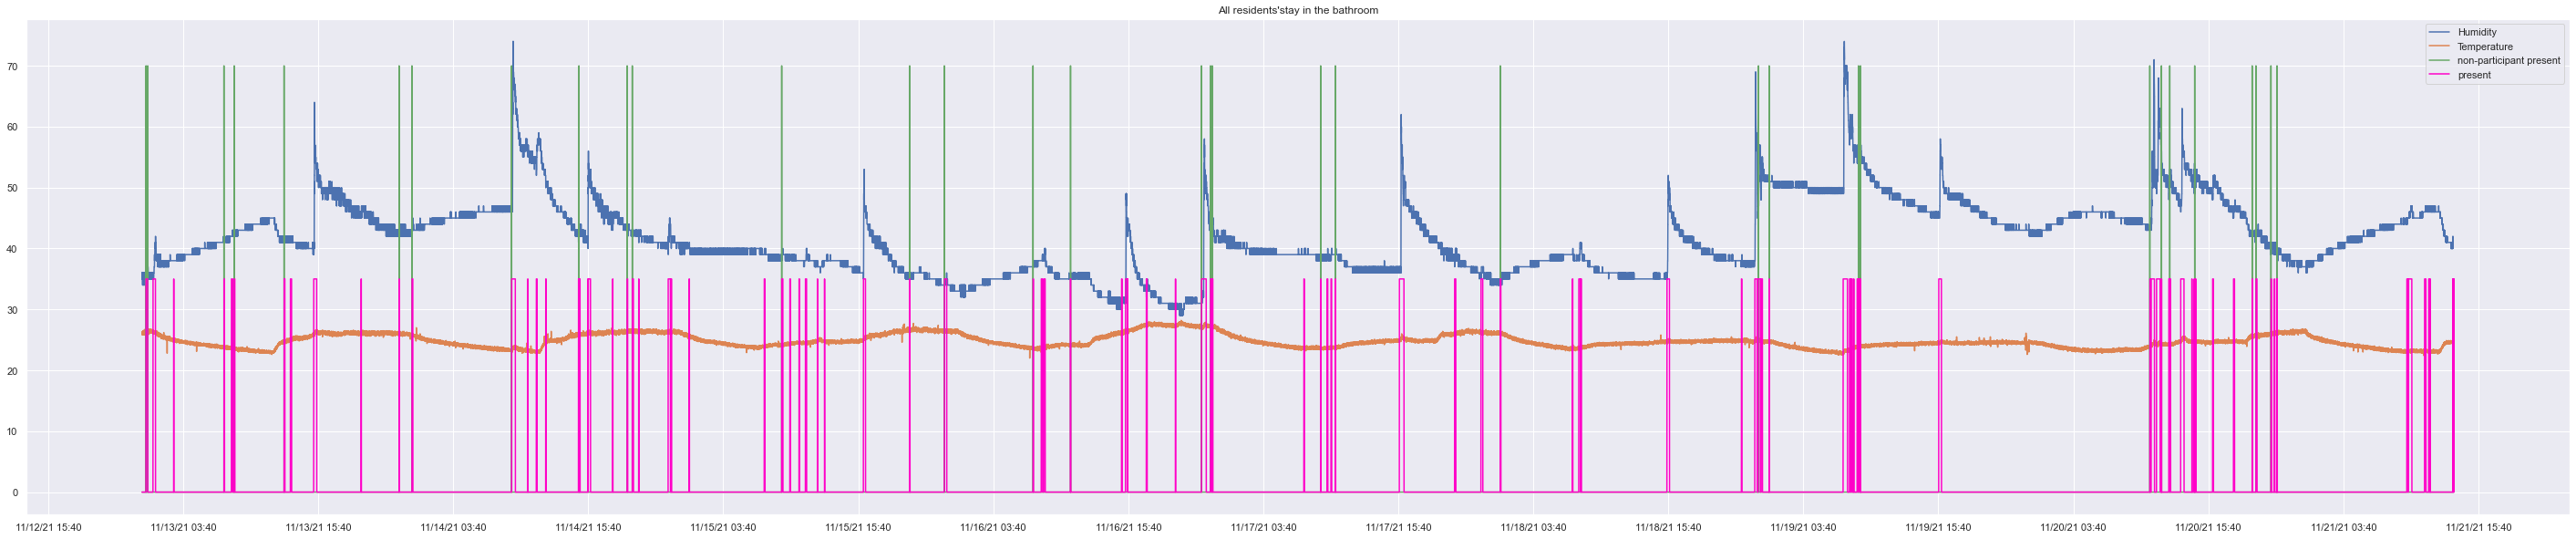

In [11]:
df_LDR.loc[df_LDR['LDRstatus'] == 0.5, 'LDRstatus'] = 35
df_Button.loc[df_Button['button_status'] == 1, 'button_status'] = 70
fig1 = plt.figure(figsize=(50, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT['ts'], df_DHT['Humidity'], color="#4C72B0")
plt.plot( df_DHT['ts'], df_DHT['Temperature'], color="#DD8452")
plt.plot( df_Button['ts'], df_Button['button_status'], color="#67a867")
plt.plot( df_LDR['ts'], df_LDR['LDRstatus'], color="#ff00c8")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("All residents'stay in the bathroom")
ax.legend(["Humidity","Temperature", "non-participant present","present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

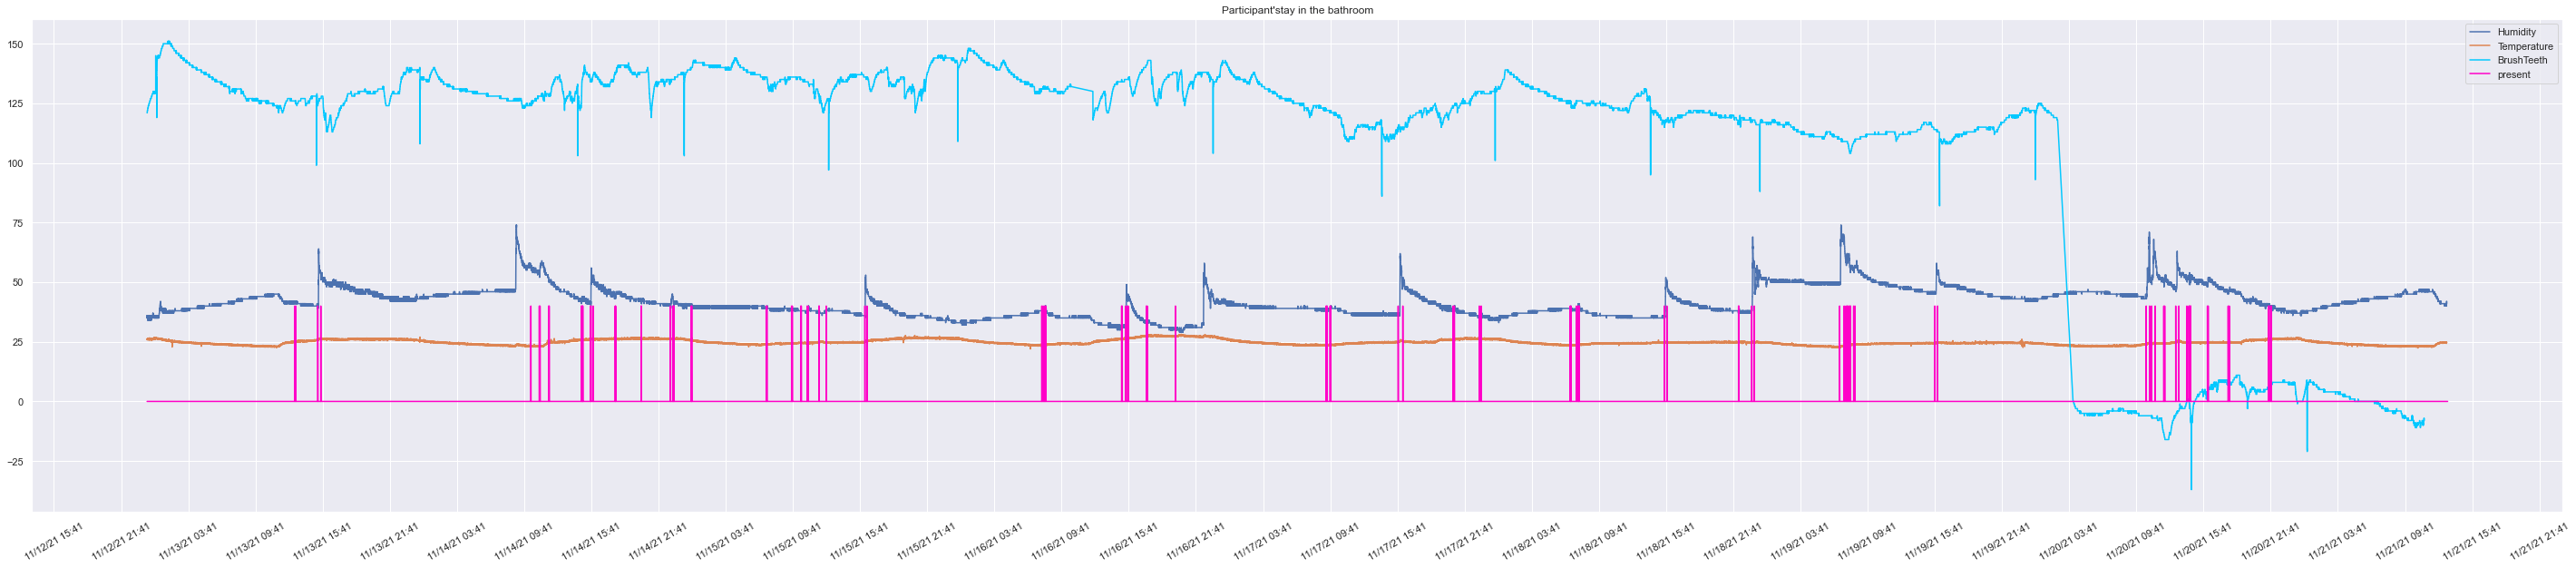

In [14]:
df_combine1.loc[df_combine1['LDRstatus'] == 0.5, 'LDRstatus'] = 35
fig1 = plt.figure(figsize=(50, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT['ts'], df_DHT['Humidity'], color="#4C72B0")
plt.plot( df_DHT['ts'], df_DHT['Temperature'], color="#DD8452")
plt.plot( df_toothbrush['ts'], df_toothbrush['cup_weight'], color="#03c8ff")
plt.plot( df_combine1['ts'], df_combine1['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 30)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=360))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom")
ax.legend(["Humidity", "Temperature","BrushTeeth", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Saturday")

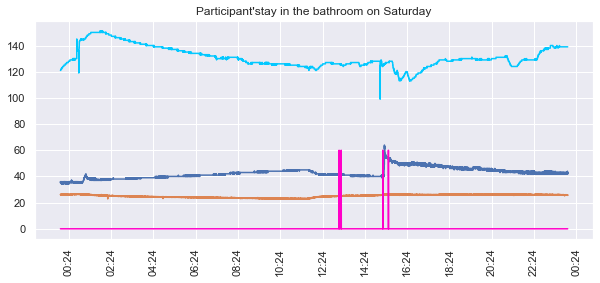

In [95]:
df_DHT_sa = df_DHT.copy()
# df_DHT_sa.drop( df_DHT[ df_DHT['ts'] < pd.Timestamp(2021,11,13) ].index, inplace=True)
df_DHT_sa.drop( df_DHT_sa[ df_DHT_sa['ts'] > pd.Timestamp(2021,11,14) ].index, inplace=True)
df_combine1_sa = df_combine1.copy()
# df_combine1_sa.drop( df_combine1[ df_combine1['ts'] < pd.Timestamp(2021,11,13) ].index, inplace=True)
df_combine1_sa.drop( df_combine1_sa[ df_combine1_sa['ts'] > pd.Timestamp(2021,11,14) ].index, inplace=True)
df_combine1_sa.loc[df_combine1_sa['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_sa = df_toothbrush.copy()
df_toothbrush_sa.drop( df_toothbrush_sa[ df_toothbrush_sa['ts'] < pd.Timestamp(2021,11,13) ].index, inplace=True)
df_toothbrush_sa.drop( df_toothbrush_sa[ df_toothbrush_sa['ts'] > pd.Timestamp(2021,11,14) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_sa['ts'], df_DHT_sa['Humidity'], color="#4C72B0")
plt.plot( df_DHT_sa['ts'], df_DHT_sa['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_sa['ts'], df_toothbrush_sa['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_sa['ts'], df_combine1_sa['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Saturday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Sunday")

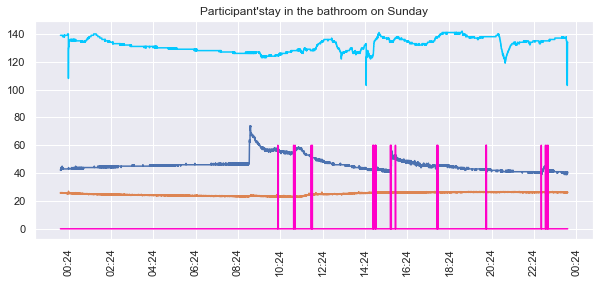

In [97]:
df_DHT_su = df_DHT.copy()
df_DHT_su.drop( df_DHT_su[ df_DHT_su['ts'] < pd.Timestamp(2021,11,14) ].index, inplace=True)
df_DHT_su.drop( df_DHT_su[ df_DHT_su['ts'] > pd.Timestamp(2021,11,15) ].index, inplace=True)
df_combine1_su = df_combine1.copy()
df_combine1_su.drop( df_combine1_su[ df_combine1_su['ts'] < pd.Timestamp(2021,11,14) ].index, inplace=True)
df_combine1_su.drop( df_combine1_su[ df_combine1_su['ts'] > pd.Timestamp(2021,11,15) ].index, inplace=True)
df_combine1_su.loc[df_combine1_su['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_su = df_toothbrush.copy()
df_toothbrush_su.drop( df_toothbrush_su[ df_toothbrush_su['ts'] < pd.Timestamp(2021,11,14) ].index, inplace=True)
df_toothbrush_su.drop( df_toothbrush_su[ df_toothbrush_su['ts'] > pd.Timestamp(2021,11,15) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_su['ts'], df_DHT_su['Humidity'], color="#4C72B0")
plt.plot( df_DHT_su['ts'], df_DHT_su['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_su['ts'], df_toothbrush_su['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_su['ts'], df_combine1_su['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Sunday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Monday")

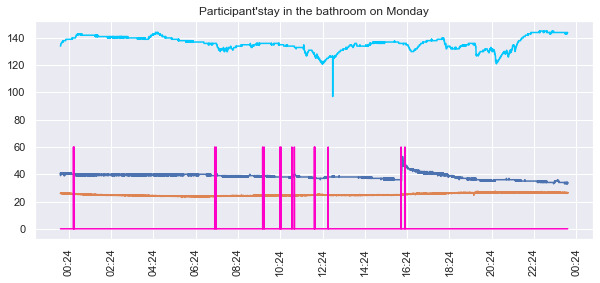

In [98]:
df_DHT_mo = df_DHT.copy()
df_DHT_mo.drop( df_DHT_mo[ df_DHT_mo['ts'] < pd.Timestamp(2021,11,15) ].index, inplace=True)
df_DHT_mo.drop( df_DHT_mo[ df_DHT_mo['ts'] > pd.Timestamp(2021,11,16) ].index, inplace=True)
df_combine1_mo = df_combine1.copy()
df_combine1_mo.drop( df_combine1_mo[ df_combine1_mo['ts'] < pd.Timestamp(2021,11,15) ].index, inplace=True)
df_combine1_mo.drop( df_combine1_mo[ df_combine1_mo['ts'] > pd.Timestamp(2021,11,16) ].index, inplace=True)
df_combine1_mo.loc[df_combine1_mo['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_mo = df_toothbrush.copy()
df_toothbrush_mo.drop( df_toothbrush_mo[ df_toothbrush_mo['ts'] < pd.Timestamp(2021,11,15) ].index, inplace=True)
df_toothbrush_mo.drop( df_toothbrush_mo[ df_toothbrush_mo['ts'] > pd.Timestamp(2021,11,16) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_mo['ts'], df_DHT_mo['Humidity'], color="#4C72B0")
plt.plot( df_DHT_mo['ts'], df_DHT_mo['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_mo['ts'], df_toothbrush_mo['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_mo['ts'], df_combine1_mo['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Monday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Tuesday")

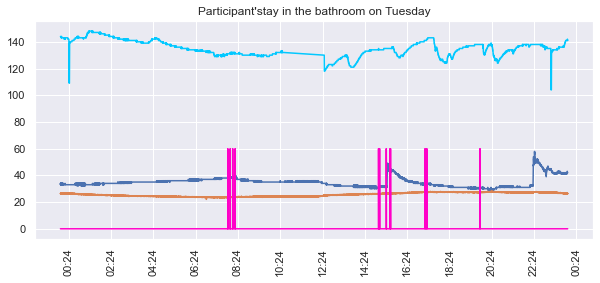

In [99]:
df_DHT_tu = df_DHT.copy()
df_DHT_tu.drop( df_DHT_tu[ df_DHT_tu['ts'] < pd.Timestamp(2021,11,16) ].index, inplace=True)
df_DHT_tu.drop( df_DHT_tu[ df_DHT_tu['ts'] > pd.Timestamp(2021,11,17) ].index, inplace=True)
df_combine1_tu = df_combine1.copy()
df_combine1_tu.drop( df_combine1_tu[ df_combine1_tu['ts'] < pd.Timestamp(2021,11,16) ].index, inplace=True)
df_combine1_tu.drop( df_combine1_tu[ df_combine1_tu['ts'] > pd.Timestamp(2021,11,17) ].index, inplace=True)
df_combine1_tu.loc[df_combine1_tu['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_tu = df_toothbrush.copy()
df_toothbrush_tu.drop( df_toothbrush_tu[ df_toothbrush_tu['ts'] < pd.Timestamp(2021,11,16) ].index, inplace=True)
df_toothbrush_tu.drop( df_toothbrush_tu[ df_toothbrush_tu['ts'] > pd.Timestamp(2021,11,17) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_tu['ts'], df_DHT_tu['Humidity'], color="#4C72B0")
plt.plot( df_DHT_tu['ts'], df_DHT_tu['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_tu['ts'], df_toothbrush_tu['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_tu['ts'], df_combine1_tu['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Tuesday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Wenesday")

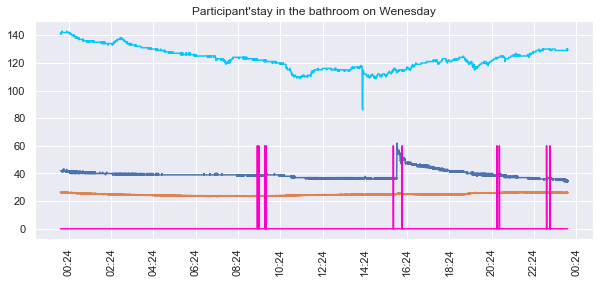

In [100]:
df_DHT_we = df_DHT.copy()
df_DHT_we.drop( df_DHT_we[ df_DHT_we['ts'] < pd.Timestamp(2021,11,17) ].index, inplace=True)
df_DHT_we.drop( df_DHT_we[ df_DHT_we['ts'] > pd.Timestamp(2021,11,18) ].index, inplace=True)
df_combine1_we = df_combine1.copy()
df_combine1_we.drop( df_combine1_we[ df_combine1_we['ts'] < pd.Timestamp(2021,11,17) ].index, inplace=True)
df_combine1_we.drop( df_combine1_we[ df_combine1_we['ts'] > pd.Timestamp(2021,11,18) ].index, inplace=True)
df_combine1_we.loc[df_combine1_we['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_we = df_toothbrush.copy()
df_toothbrush_we.drop( df_toothbrush_we[ df_toothbrush_we['ts'] < pd.Timestamp(2021,11,17) ].index, inplace=True)
df_toothbrush_we.drop( df_toothbrush_we[ df_toothbrush_we['ts'] > pd.Timestamp(2021,11,18) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_we['ts'], df_DHT_we['Humidity'], color="#4C72B0")
plt.plot( df_DHT_we['ts'], df_DHT_we['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_we['ts'], df_toothbrush_we['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_we['ts'], df_combine1_we['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Wenesday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Thursday")

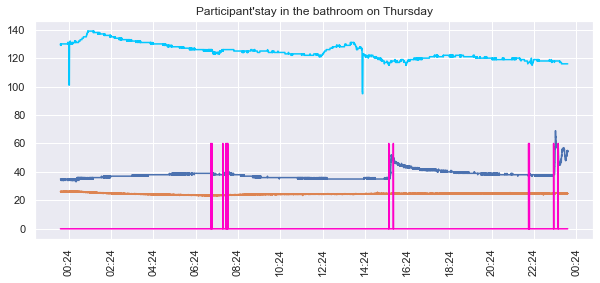

In [101]:
df_DHT_th = df_DHT.copy()
df_DHT_th.drop( df_DHT_th[ df_DHT_th['ts'] < pd.Timestamp(2021,11,18) ].index, inplace=True)
df_DHT_th.drop( df_DHT_th[ df_DHT_th['ts'] > pd.Timestamp(2021,11,19) ].index, inplace=True)
df_combine1_th = df_combine1.copy()
df_combine1_th.drop( df_combine1_th[ df_combine1_th['ts'] < pd.Timestamp(2021,11,18) ].index, inplace=True)
df_combine1_th.drop( df_combine1_th[ df_combine1_th['ts'] > pd.Timestamp(2021,11,19) ].index, inplace=True)
df_combine1_th.loc[df_combine1_th['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_th = df_toothbrush.copy()
df_toothbrush_th.drop( df_toothbrush_th[ df_toothbrush_th['ts'] < pd.Timestamp(2021,11,18) ].index, inplace=True)
df_toothbrush_th.drop( df_toothbrush_th[ df_toothbrush_th['ts'] > pd.Timestamp(2021,11,19) ].index, inplace=True)


fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_th['ts'], df_DHT_th['Humidity'], color="#4C72B0")
plt.plot( df_DHT_th['ts'], df_DHT_th['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_th['ts'], df_toothbrush_th['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_th['ts'], df_combine1_th['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Thursday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

Text(0.5, 1.0, "Participant'stay in the bathroom on Friday")

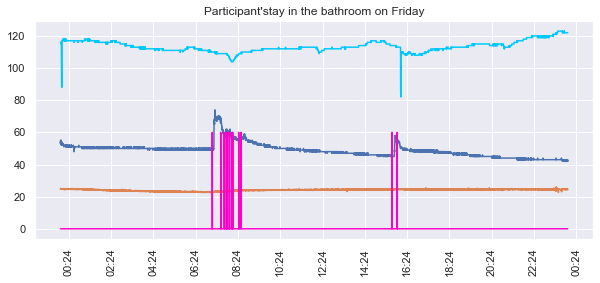

In [102]:
df_DHT_fr = df_DHT.copy()
df_DHT_fr.drop( df_DHT_fr[ df_DHT_fr['ts'] < pd.Timestamp(2021,11,19) ].index, inplace=True)
df_DHT_fr.drop( df_DHT_fr[ df_DHT_fr['ts'] > pd.Timestamp(2021,11,20) ].index, inplace=True)
df_combine1_fr = df_combine1.copy()
df_combine1_fr.drop( df_combine1_fr[ df_combine1_fr['ts'] < pd.Timestamp(2021,11,19) ].index, inplace=True)
df_combine1_fr.drop( df_combine1_fr[ df_combine1_fr['ts'] > pd.Timestamp(2021,11,20) ].index, inplace=True)
df_combine1_fr.loc[df_combine1_fr['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_fr = df_toothbrush.copy()
df_toothbrush_fr.drop( df_toothbrush_fr[ df_toothbrush_fr['ts'] < pd.Timestamp(2021,11,19) ].index, inplace=True)
df_toothbrush_fr.drop( df_toothbrush_fr[ df_toothbrush_fr['ts'] > pd.Timestamp(2021,11,20) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_fr['ts'], df_DHT_fr['Humidity'], color="#4C72B0")
plt.plot( df_DHT_fr['ts'], df_DHT_fr['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_fr['ts'], df_toothbrush_fr['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_fr['ts'], df_combine1_fr['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Friday")
# ax.legend(["Humidity", "Temperature", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

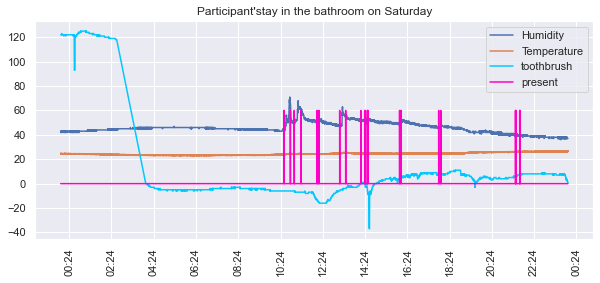

In [105]:
df_DHT_sa1 = df_DHT.copy()
df_DHT_sa1.drop( df_DHT_sa1[ df_DHT_sa1['ts'] < pd.Timestamp(2021,11,20) ].index, inplace=True)
df_DHT_sa1.drop( df_DHT_sa1[ df_DHT_sa1['ts'] > pd.Timestamp(2021,11,21) ].index, inplace=True)
df_combine1_sa1 = df_combine1.copy()
df_combine1_sa1.drop( df_combine1_sa1[ df_combine1_sa1['ts'] < pd.Timestamp(2021,11,20) ].index, inplace=True)
df_combine1_sa1.drop( df_combine1_sa1[ df_combine1_sa1['ts'] > pd.Timestamp(2021,11,21) ].index, inplace=True)
df_combine1_sa1.loc[df_combine1_sa1['LDRstatus'] == 0.5, 'LDRstatus'] = 60
df_toothbrush_sa1 = df_toothbrush.copy()
df_toothbrush_sa1.drop( df_toothbrush_sa1[ df_toothbrush_sa1['ts'] < pd.Timestamp(2021,11,20) ].index, inplace=True)
df_toothbrush_sa1.drop( df_toothbrush_sa1[ df_toothbrush_sa1['ts'] > pd.Timestamp(2021,11,21) ].index, inplace=True)

fig1 = plt.figure(figsize=(10, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_DHT_sa1['ts'], df_DHT_sa1['Humidity'], color="#4C72B0")
plt.plot( df_DHT_sa1['ts'], df_DHT_sa1['Temperature'], color="#DD8452")
plt.plot( df_toothbrush_sa1['ts'], df_toothbrush_sa1['cup_weight'], color="#03c8ff")
plt.plot( df_combine1_sa1['ts'], df_combine1_sa1['LDRstatus'], color="#ff00c8")
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=120))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("Participant'stay in the bathroom on Saturday")
ax.legend(["Humidity", "Temperature", "toothbrush", "present"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

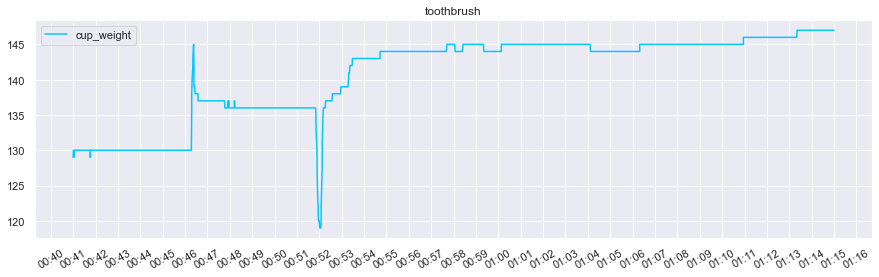

In [39]:
df_toothbrush_small = df_toothbrush.copy()
df_toothbrush_small.drop( df_toothbrush_small[ df_toothbrush_small['ts'] < pd.Timestamp("2021-11-13 00:41:00") ].index, inplace=True)
df_toothbrush_small.drop( df_toothbrush_small[ df_toothbrush_small['ts'] > pd.Timestamp("2021-11-13 01:15:00") ].index, inplace=True)

fig1 = plt.figure(figsize=(15, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_toothbrush_small['ts'], df_toothbrush_small['cup_weight'], color="#03c8ff")
plt.xticks(rotation = 30)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("toothbrush")
ax.legend(["cup_weight"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

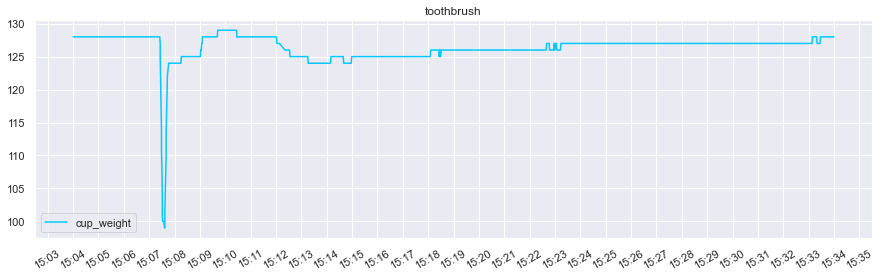

In [37]:
df_toothbrush_small = df_toothbrush.copy()
df_toothbrush_small.drop( df_toothbrush_small[ df_toothbrush_small['ts'] < pd.Timestamp("2021-11-13 15:04:00") ].index, inplace=True)
df_toothbrush_small.drop( df_toothbrush_small[ df_toothbrush_small['ts'] > pd.Timestamp("2021-11-13 15:34:00") ].index, inplace=True)

fig1 = plt.figure(figsize=(15, 4))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_toothbrush_small['ts'], df_toothbrush_small['cup_weight'], color="#03c8ff")
plt.xticks(rotation = 30)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 
ax.set_title("toothbrush")
ax.legend(["cup_weight"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

In [17]:
df_LDR_dust = pd.read_csv(LDR, encoding= 'unicode_escape')
df_LDR_dust.head()
df_LDR_dust = df_LDR_dust.drop(df_LDR_dust.columns[[0,1,3,4,5,6,9,10]], axis=1)

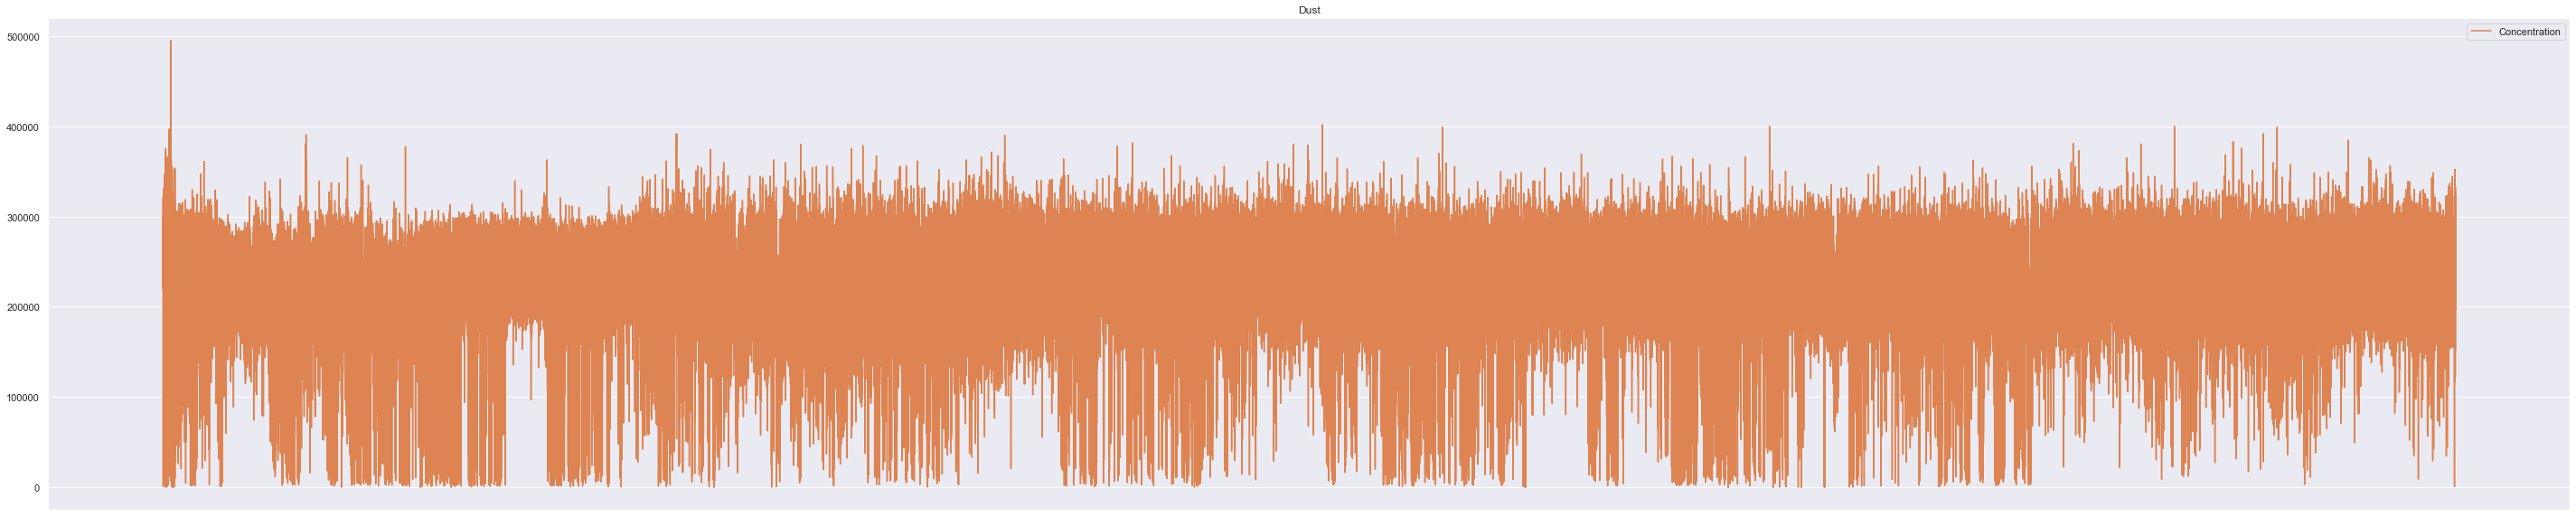

In [111]:
fig1 = plt.figure(figsize=(50, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_LDR_dust['ts'], df_LDR_dust['Concentration'], color="#DD8452")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("Dust")
ax.legend(["Concentration"])
# save graph
# fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero